<a href="https://colab.research.google.com/github/Yaki-55/machineLearning/blob/main/Aprendizaje_reforzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Hasta ahora, nuestros agentes se han basado en información detallada sobre cómo jugar el juego. ¡La heurística realmente brinda mucha orientación sobre cómo seleccionar movimientos!

En este tutorial, aprenderás a usar el aprendizaje por refuerzo para crear un agente inteligente. Refinaremos gradualmente la estrategia del agente con el tiempo, simplemente jugando e intentando maximizar la tasa de ganancias.

En este cuaderno, no podremos explorar este campo complejo en detalle, pero aprenderás sobre el panorama general y explorarás el código que puedes usar para capacitar a tu propio agente.

# Redes neuronales

¿No sería mucho más fácil si tuviéramos una forma más sistemática de mejorar la experiencia de juego del agente?

En este tutorial, con este objetivo, reemplazaremos la heurística con una red neuronal.

La red acepta la placa actual como entrada. Y genera una probabilidad para cada movimiento posible.

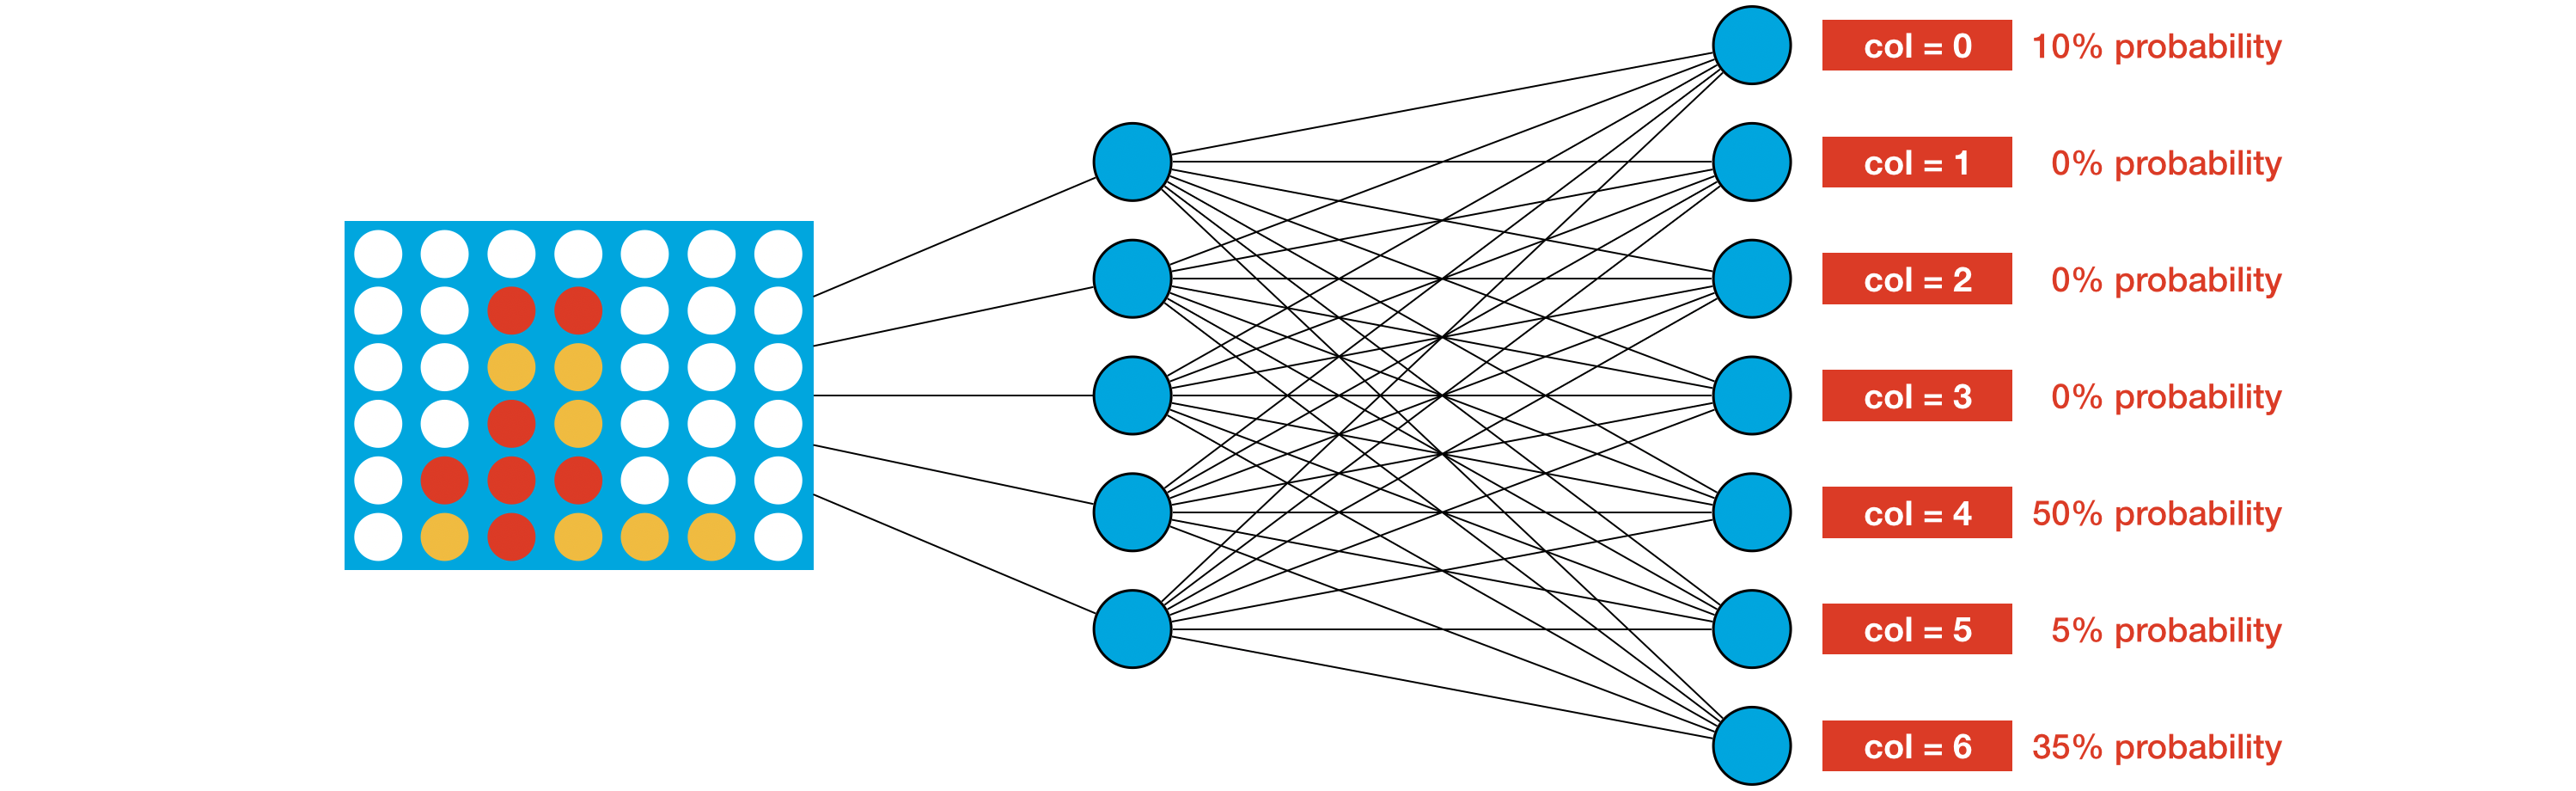

Luego, el agente selecciona un movimiento tomando muestras de estas probabilidades. Por ejemplo, para el tablero de juego de la imagen de arriba, el agente selecciona la columna 4 con un 50 % de probabilidad.

De esta manera, para codificar una buena estrategia de juego, solo necesitamos modificar los pesos de la red para que, para cada tablero de juego posible, asigne mayores probabilidades a mejores movimientos.

Al menos en teoría, ese es nuestro objetivo. En la práctica, no comprobaremos si ese es el caso, ya que recuerda que Connect Four tiene más de 4 billones de tableros de juego posibles.

# Configuración
¿Cómo podemos abordar la tarea de modificar los pesos de la red, en la práctica? Este es el enfoque que tomaremos en esta lección:

Después de cada movimiento, le damos al agente una recompensa que le dice qué tan bien lo hizo:

Si el agente gana la partida en esa jugada, le damos una recompensa de +1.
De lo contrario, si el agente realiza un movimiento inválido (que finaliza el juego), le otorgamos una recompensa de -10.

De lo contrario, si el oponente gana el juego en su siguiente movimiento (es decir, el agente no pudo evitar que su oponente ganara), le damos al agente una recompensa de -1.

De lo contrario, el agente obtiene una recompensa de 1/42.
Al final de cada juego, el agente suma su recompensa. Nos referimos a la suma de recompensas como la recompensa acumulada del agente.

Por ejemplo, si el juego duró 8 movimientos (cada jugador jugó cuatro veces) y el agente finalmente ganó, entonces su recompensa acumulada es 3*(1/42) + 1.
Si el juego duró 11 movimientos (y el oponente fue primero, por lo que el agente jugó cinco veces) y el oponente ganó en su movimiento final, entonces la recompensa acumulada del agente es 4*(1/42) - 1.

Si el juego termina en empate, entonces el agente jugó exactamente 21 movimientos y obtiene una recompensa acumulada de 21*(1/42).

Si el juego duró 7 movimientos y terminó con el agente seleccionando un movimiento inválido, el agente obtiene una recompensa acumulada de 3*(1/42) - 10.

Nuestro objetivo es encontrar los pesos de la red neuronal que (en promedio) maximicen la recompensa acumulada del agente.

Esta idea de usar la recompensa para rastrear el desempeño de un agente es una idea central en el campo del aprendizaje por refuerzo. Una vez que definimos el problema de esta manera, podemos usar cualquiera de una variedad de algoritmos de aprendizaje por refuerzo para producir un agente.

# Aprendizaje reforzado

Inicialmente, los pesos se establecen en valores aleatorios.
A medida que el agente juega, el algoritmo prueba continuamente nuevos valores para los pesos, para ver cómo se ve afectada la recompensa acumulada, en promedio. Con el tiempo, después de jugar muchos juegos, tenemos una buena idea de cómo los pesos afectan la recompensa acumulada, y el algoritmo se establece en los pesos que funcionan mejor.
De esta forma, terminaremos con un agente que intenta ganar la partida (para que obtenga la recompensa final de +1, y evita el -1 y el -10) e intenta que la partida dure el mayor tiempo posible (para que cobra la bonificación de 1/42 tantas veces como pueda).
Podría argumentar que realmente no tiene sentido querer que el juego dure tanto como sea posible; esto podría resultar en un agente muy ineficiente que no realiza jugadas ganadoras obvias al principio del juego. Y, su intuición sería correcta: ¡esto hará que el agente tarde más en realizar un movimiento ganador! La razón por la que incluimos la bonificación de 1/42 es para ayudar a los algoritmos que usaremos a converger mejor.

# Código
Hay muchas implementaciones excelentes de algoritmos de aprendizaje por refuerzo en línea. En este curso, usaremos Stable-Baselines3

In [ ]:
!pip install kaggle_environments

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for chess: filename=chess-1.11.1-py3-none-any.whl size=148499 sha256=5d47baa852da3d14ab3dcb539267f4217ae49d4844289d6dc0bc8837f06b0e14
  Stored in directory: /root/.cache/pip/wheels/2e/2d/23/1bfc95db984ed3ecbf6764167dc7526d0ab521cf9a9852544e
Successfully built chess


In [ ]:
!pip install vec_noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vec_noise: filename=vec_noise-1.1.4-cp310-cp310-linux_x86_64.whl size=73552 sha256=e528da2360de794b94370a509c1817a57307963f105720086890349ee10cd05f
  Stored in directory: /root/.cache/pip/wheels/2b/28/e4/f710af1a5bb24bb6da3d4f65081e268ca85034b7ac0a9237fe
Successfully built vec_noise


In [ ]:
!pip install pettingzoo

In [ ]:
!pip install shimmy

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import gym
from kaggle_environments import make, evaluate
from gym import spaces

class ConnectFourGym(gym.Env):
    def __init__(self, agent2="random"):
        ks_env = make("connectx", debug=True)
        self.env = ks_env.train([None, agent2])
        self.rows = ks_env.configuration.rows
        self.columns = ks_env.configuration.columns
        self.action_space = spaces.Discrete(self.columns)
        self.observation_space = spaces.Box(low=0, high=2,
                                            shape=(1,self.rows,self.columns), dtype=int)
        # Tupla correspondiente a las recompensas mínimas y máximas posibles
        self.reward_range = (-10, 1)
        # StableBaselines arroja un error si no están definidos
        self.spec = None
        self.metadata = None
    def reset(self):
        self.obs = self.env.reset()
        return np.array(self.obs['board']).reshape(1,self.rows,self.columns)
    def change_reward(self, old_reward, done):
        if old_reward == 1: # El agente ganó el juego
            return 1
        elif done: # El oponente ganó el juego
            return -1
        else: # Recompensa 1/42
            return 1/(self.rows*self.columns)
    def step(self, action):
        # Comprobar si el movimiento del agente es válido
        is_valid = (self.obs['board'][int(action)] == 0)
        if is_valid: # Juega el movimiento
            self.obs, old_reward, done, _ = self.env.step(int(action))
            reward = self.change_reward(old_reward, done)
        else: # Termina el juego y penaliza al agente
            reward, done, _ = -10, True, {}
        return np.array(self.obs['board']).reshape(1,self.rows,self.columns), reward, done, _

En este cuaderno, entrenaremos a un agente para vencer al agente aleatorio. Especificamos este oponente en el argumento agent2 a continuación.

In [ ]:
# Crear entorno ConnectFour
env = ConnectFourGym(agent2="random")

El siguiente paso es especificar la arquitectura de la red neuronal. En este caso, utilizamos una red neuronal convolucional.

Tenga en cuenta que esta es la red neuronal que genera las probabilidades de seleccionar cada columna.

In [ ]:
import torch as th
import torch.nn as nn

!pip install "stable-baselines3"
from stable_baselines3 import PPO
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

# Red neuronal para predecir valores de acción
class CustomCNN(BaseFeaturesExtractor):

    def __init__(self, observation_space: gym.spaces.Box, features_dim: int=128):
        super(CustomCNN, self).__init__(observation_space, features_dim)
        # Imágenes CxHxW (canales primero)
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 32, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Calcula la forma haciendo un pase hacia adelante
        with th.no_grad():
            n_flatten = self.cnn(
                th.as_tensor(observation_space.sample()[None]).float()
            ).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: th.Tensor) -> th.Tensor:
        return self.linear(self.cnn(observations))

policy_kwargs = dict(
    features_extractor_class=CustomCNN,
)

# Inicializar agente
model = PPO("CnnPolicy", env, policy_kwargs=policy_kwargs, verbose=0)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


En la celda de código anterior, los pesos de la red neuronal se establecen inicialmente en valores aleatorios.

En la siguiente celda de código, "entrenamos al agente", que es solo otra forma de decir que encontramos pesos de la red neuronal que probablemente resulten en que el agente seleccione buenos movimientos.

In [ ]:
# entrenar agente
model.learn(total_timesteps=10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Finalmente, especificamos el agente capacitado en el formato requerido para la competencia.

In [ ]:
def agent1(obs, config):

    # Usa el mejor modelo para seleccionar una columna
    col, _ = model.predict(np.array(obs['board']).reshape(1, 6,7))

    # Comprobar si la columna seleccionada es válida
    is_valid = (obs['board'][int(col)] == 0)

    # Si no es válido, seleccione movimiento aleatorio.
    if is_valid:
        return int(col)
    else:
        return random.choice([col for col in range(config.columns) if obs.board[int(col)] == 0])

En la siguiente celda de código, vemos el resultado de una ronda de juego contra un agente aleatorio.

In [ ]:
# Crea el entorno del juego
env = make("connectx")

# Dos agentes aleatorios juegan una ronda de juego
env.run([agent1, "random"])

# Mostrar el juego
env.render(mode="ipython")

Y calculamos cómo se desempeña en promedio, contra el agente aleatorio.

In [ ]:
def get_win_percentages(agent1, agent2, n_rounds=100):

    # Usar la configuración predeterminada de Connecta 4
    config = {'rows': 6, 'columns': 7, 'inarow': 4}

    # El agente 1 va primero (aproximadamente) la mitad de las veces
    outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2)

    # El agente 2 va primero (aproximadamente) la mitad del tiempo
    outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
    print("Porcentaje de victorias del agente 1:", np.round(outcomes.count([1,-1])/len(outcomes), 2))
    print("Porcentaje de victorias del agente 2:", np.round(outcomes.count([-1,1])/len(outcomes), 2))
    print("Número de jugadas no válidas por el agente 1:", outcomes.count([None, 0]))
    print("Número de jugadas no válidas por el agente 2:", outcomes.count([0, None]))

In [ ]:
get_win_percentages(agent1=agent1, agent2="random")

Porcentaje de victorias del agente 1: 0.52
Porcentaje de victorias del agente 2: 0.48
Número de jugadas no válidas por el agente 1: 0
Número de jugadas no válidas por el agente 2: 0


Es importante tener en cuenta que el agente que hemos creado aquí solo fue entrenado para vencer al agente aleatorio, porque toda su experiencia de juego ha sido con el agente aleatorio como oponente.

Si queremos producir un agente que funcione de manera confiable mejor que muchos otros agentes, tenemos que exponer nuestro agente a estos otros agentes durante el entrenamiento.